In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250526.csv')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [ ]:
print(df.isnull().sum())

Date             0
Local Route      0
Light Rail       0
Peak Service     0
Rapid Route      0
School           0
Other           20
dtype: int64


In [ ]:
df['Other'].fillna(0, inplace=True)

<ipython-input-31-923d4cb7d26a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Other'].fillna(0, inplace=True)


In [ ]:
print(df.isnull().sum())

Date            0
Local Route     0
Light Rail      0
Peak Service    0
Rapid Route     0
School          0
Other           0
dtype: int64


In [ ]:
df['Total Passengers'] = df[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']].sum(axis=1)

In [ ]:
print(df.head())

        Date  Local Route  Light Rail  Peak Service  Rapid Route  School  \
0 2024-08-30        16436       10705           225        19026    3925   
1 2023-09-15        15499       10671           267        18421    4519   
2 2021-12-28         1756        2352             0         3775       0   
3 2023-01-11        10536        8347           223        14072       0   
4 2021-09-11          820         612             0         1283       0   

   Other  Total Passengers  
0   59.0           50376.0  
1   61.0           49438.0  
2   13.0            7896.0  
3   48.0           33226.0  
4   11.0            2726.0  


FINDING THE BUSIEST DAYS

In [ ]:
busiest_days = df.sort_values(by='Total Passengers', ascending=False)
print(busiest_days.head(5))

           Date  Local Route  Light Rail  Peak Service  Rapid Route  School  \
1039 2020-02-27        21070       13081           488        28678    6435   
350  2020-02-25        21059       13128           529        28340    6634   
1260 2020-02-26        20972       13015           478        28359    6518   
1611 2020-02-21        20196       14773           381        27274    6270   
133  2020-02-28        20266       14527           416        27198    6358   

      Other  Total Passengers  
1039    0.0           69752.0  
350     0.0           69690.0  
1260    1.0           69343.0  
1611    1.0           68895.0  
133     0.0           68765.0  


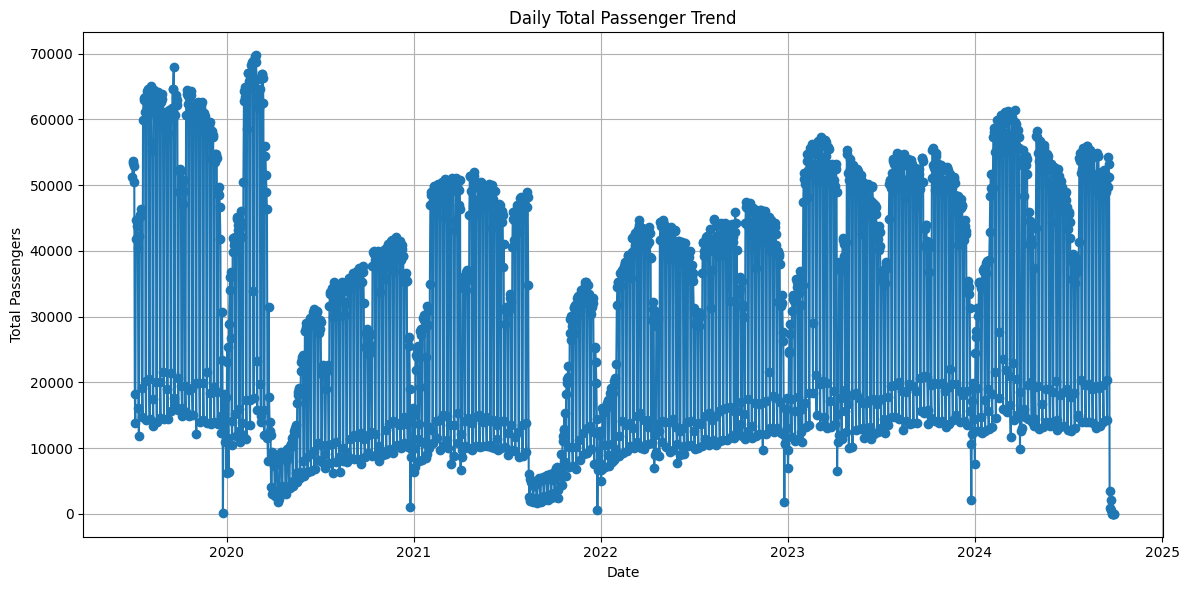

In [ ]:
import matplotlib.pyplot as plt

df = df.sort_values(by='Date')

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Total Passengers'], marker='o', linestyle='-')
plt.title('Daily Total Passenger Trend')
plt.xlabel('Date')
plt.ylabel('Total Passengers')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df['Daily Change'] = df['Total Passengers'].diff()

print(df.sort_values(by='Daily Change', ascending=False).head())
print(df.sort_values(by='Daily Change').head())


           Date  Local Route  Light Rail  Peak Service  Rapid Route  School  \
567  2020-03-10        20171       12442           493        27226    6571   
203  2020-02-17        19785       12012           482        25998    6668   
105  2020-03-02        19911       12308           485        26947    6518   
119  2020-02-24        20110       12211           516        26749    6622   
1403 2024-03-12        19088       12106           398        22339    6038   

      Other  Total Passengers  Daily Change  
567    35.0           66938.0       52897.0  
203     0.0           64945.0       51389.0  
105     0.0           66169.0       50413.0  
119     0.0           66208.0       48639.0  
1403  101.0           60070.0       48365.0  
           Date  Local Route  Light Rail  Peak Service  Rapid Route  School  \
353  2019-09-21         4555        5740             0         7260       0   
365  2020-02-15         3686        5603             0         8089       0   
1613 2024-09

In [ ]:
start_date = df['Date'].min()
end_date = df['Date'].max()
print(f"The dataset covers from {start_date.date()} to {end_date.date()}")

The dataset covers from 2019-07-01 to 2024-09-29


In [ ]:
from datetime import datetime

start_date = datetime.strptime('2019-07-01', '%Y-%m-%d')
end_date = datetime.strptime('2024-09-29', '%Y-%m-%d')

difference = end_date - start_date
print(f"Number of days covered in the dataset: {difference.days + 1}")  # +1 to include both start and end dates


Number of days covered in the dataset: 1918


In [ ]:
public_holidays = [
    '2024-01-01',
    '2024-01-26',
    '2024-08-15',
    '2024-10-02',
]

In [ ]:
public_holidays = pd.to_datetime(public_holidays)

In [ ]:
df['Is_Holiday'] = df['Date'].isin(public_holidays)

In [ ]:
holiday_data = df[df['Is_Holiday'] == True]

In [ ]:
holiday_sums = {
    'Local Route': holiday_data['Local Route'].sum(),
    'Light Rail': holiday_data['Light Rail'].sum(),
    'Peak Service': holiday_data['Peak Service'].sum(),
    'Rapid Route': holiday_data['Rapid Route'].sum(),
    'School': holiday_data['School'].sum(),
    'Other': holiday_data['Other'].sum()
}

In [ ]:
most_used_transport = max(holiday_sums, key=holiday_sums.get)
most_used_passengers = holiday_sums[most_used_transport]


In [ ]:
print(f"On holidays, the most used transport is '{most_used_transport}' with {most_used_passengers} passengers.")

On holidays, the most used transport is 'Rapid Route' with 31217 passengers.


In [ ]:
start_date = df['Date'].min()
end_date = df['Date'].max()

In [ ]:
all_dates = pd.date_range(start=start_date, end=end_date)

In [ ]:
sundays = all_dates[all_dates.weekday == 6]

In [ ]:
public_holidays = [
    '2024-01-01',  # New Year's Day
    '2024-01-26',  # Republic Day
    '2024-08-15',  # Independence Day
    '2024-10-02',  # Gandhi Jayanti
]

In [ ]:
public_holidays = pd.to_datetime(public_holidays)


In [ ]:
all_holidays = public_holidays.append(sundays).drop_duplicates()

In [ ]:
df['Is_Holiday'] = df['Date'].isin(all_holidays)

In [ ]:
holiday_data = df[df['Is_Holiday']]

In [ ]:
holiday_sums = {
    'Local Route': holiday_data['Local Route'].sum(),
    'Light Rail': holiday_data['Light Rail'].sum(),
    'Peak Service': holiday_data['Peak Service'].sum(),
    'Rapid Route': holiday_data['Rapid Route'].sum(),
    'School': holiday_data['School'].sum(),
    'Other': holiday_data['Other'].sum()
}

In [ ]:
most_used_transport = max(holiday_sums, key=holiday_sums.get)
most_used_passengers = holiday_sums[most_used_transport]

In [ ]:
print(f"On holidays (Sundays + public holidays), the most used transport is '{most_used_transport}' with {most_used_passengers} passengers.")

On holidays (Sundays + public holidays), the most used transport is 'Rapid Route' with 1415839 passengers.


In [ ]:
year = 2023
df_year = df[df['Date'].dt.year == year]

In [ ]:
active_days = df_year[df_year['School'] > 0].shape[0]

In [ ]:
inactive_days = df_year[df_year['School'] == 0].shape[0]

In [ ]:
print(f"In the year {year}:")
print(f"School transport was active on {active_days} days.")
print(f"School transport was NOT active on {inactive_days} days.")

In the year 2023:
School transport was active on 198 days.
School transport was NOT active on 167 days.


In [ ]:
# Ensure 'Date' is datetime and extract year
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

# Group by Year and aggregate
yearly_summary = df.groupby('Year').agg(
    Active_Days = ('School', lambda x: (x > 0).sum()),
    Inactive_Days = ('School', lambda x: (x == 0).sum()),
    Total_School_Passengers = ('School', 'sum')
).reset_index()

print(yearly_summary)


   Year  Active_Days  Inactive_Days  Total_School_Passengers
0  2019          107             77                   531950
1  2020          197            169                   819218
2  2021          166            199                   742226
3  2022          197            168                   813800
4  2023          198            167                   895655
5  2024          152            121                   709620


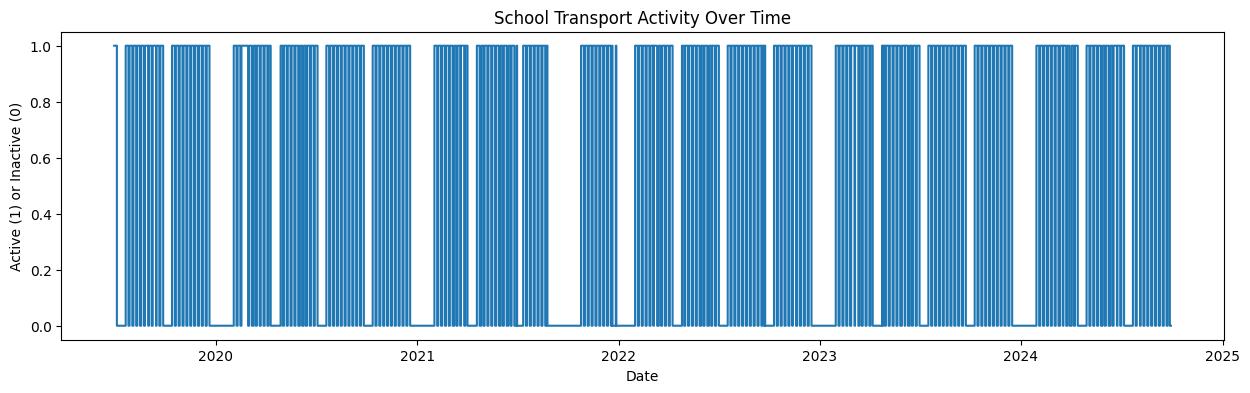

In [ ]:
import matplotlib.pyplot as plt

# Create a column marking active (1) and inactive (0)
df['School_Active'] = (df['School'] > 0).astype(int)

# Plot the active days over time
plt.figure(figsize=(15,4))
plt.plot(df['Date'], df['School_Active'], drawstyle='steps-post')
plt.title('School Transport Activity Over Time')
plt.xlabel('Date')
plt.ylabel('Active (1) or Inactive (0)')
plt.show()


In [ ]:
//AGAIN3

In [ ]:
# Group by Year and sum passengers for each transport type
transport_columns = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']
yearly_transport_sum = df.groupby('Year')[transport_columns].sum().reset_index()

# Find most used transport type per year
yearly_transport_sum['Most_Used_Transport'] = yearly_transport_sum[transport_columns].idxmax(axis=1)

print(yearly_transport_sum)


   Year  Local Route  Light Rail  Peak Service  Rapid Route  School    Other  \
0  2019      2417860     1782046         52845      3397061  531950   1017.0   
1  2020      2994326     2007162         52232      3755090  819218   7741.0   
2  2021      3010241     1976253         50270      3511858  742226  16561.0   
3  2022      3337746     2469844         50223      4141963  813800  19259.0   
4  2023      4027317     3192432         78806      5330372  895655  21587.0   
5  2024      3184206     2373129         60061      4025111  709620  16190.0   

  Most_Used_Transport  
0         Rapid Route  
1         Rapid Route  
2         Rapid Route  
3         Rapid Route  
4         Rapid Route  
5         Rapid Route  


In [ ]:
# Group by Year and sum passengers for each transport type
transport_columns = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']
yearly_transport_sum = df.groupby('Year')[transport_columns].sum().reset_index()

# Find most used transport type per year
yearly_transport_sum['Most_Used_Transport'] = yearly_transport_sum[transport_columns].idxmax(axis=1)

# Find least used transport type per year
yearly_transport_sum['Least_Used_Transport'] = yearly_transport_sum[transport_columns].idxmin(axis=1)

print(yearly_transport_sum)

   Year  Local Route  Light Rail  Peak Service  Rapid Route  School    Other  \
0  2019      2417860     1782046         52845      3397061  531950   1017.0   
1  2020      2994326     2007162         52232      3755090  819218   7741.0   
2  2021      3010241     1976253         50270      3511858  742226  16561.0   
3  2022      3337746     2469844         50223      4141963  813800  19259.0   
4  2023      4027317     3192432         78806      5330372  895655  21587.0   
5  2024      3184206     2373129         60061      4025111  709620  16190.0   

  Most_Used_Transport Least_Used_Transport  
0         Rapid Route                Other  
1         Rapid Route                Other  
2         Rapid Route                Other  
3         Rapid Route                Other  
4         Rapid Route                Other  
5         Rapid Route                Other  


In [ ]:
# Show yearly passenger counts by transport mode
print(yearly_transport_sum[['Year'] + transport_columns])

# Or save to CSV
yearly_transport_sum.to_csv('yearly_transport_passenger_counts.csv', index=False)


   Year  Local Route  Light Rail  Peak Service  Rapid Route  School    Other
0  2019      2417860     1782046         52845      3397061  531950   1017.0
1  2020      2994326     2007162         52232      3755090  819218   7741.0
2  2021      3010241     1976253         50270      3511858  742226  16561.0
3  2022      3337746     2469844         50223      4141963  813800  19259.0
4  2023      4027317     3192432         78806      5330372  895655  21587.0
5  2024      3184206     2373129         60061      4025111  709620  16190.0


In [ ]:
import pandas as pd

# Assuming your DataFrame is df and Date is already parsed as datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)  # Adjust if dayfirst or not
df['DayOfWeek'] = df['Date'].dt.day_name()  # Monday, Tuesday, etc.
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year


In [ ]:
local_route_stats = df['Local Route'].describe()
print(local_route_stats)


count     1918.000000
mean      9891.395203
std       6120.715714
min          1.000000
25%       3044.500000
50%      11417.000000
75%      15517.500000
max      21070.000000
Name: Local Route, dtype: float64


In [ ]:
highest_local_route = df.loc[df['Local Route'].idxmax()]
lowest_local_route = df.loc[df['Local Route'].idxmin()]

print("Highest Local Route Usage:\n", highest_local_route[['Date', 'Local Route']])
print("Lowest Local Route Usage:\n", lowest_local_route[['Date', 'Local Route']])


Highest Local Route Usage:
 Date           2020-02-27 00:00:00
Local Route                  21070
Name: 1039, dtype: object
Lowest Local Route Usage:
 Date           2024-09-28 00:00:00
Local Route                      1
Name: 1652, dtype: object


In [ ]:
daywise_local = df.groupby('DayOfWeek')['Local Route'].mean().sort_values(ascending=False)
print(daywise_local)


DayOfWeek
Wednesday    13378.525547
Tuesday      13243.072993
Thursday     13166.708029
Friday       12543.755474
Monday       11444.678832
Saturday      3271.156934
Sunday        2191.868613
Name: Local Route, dtype: float64


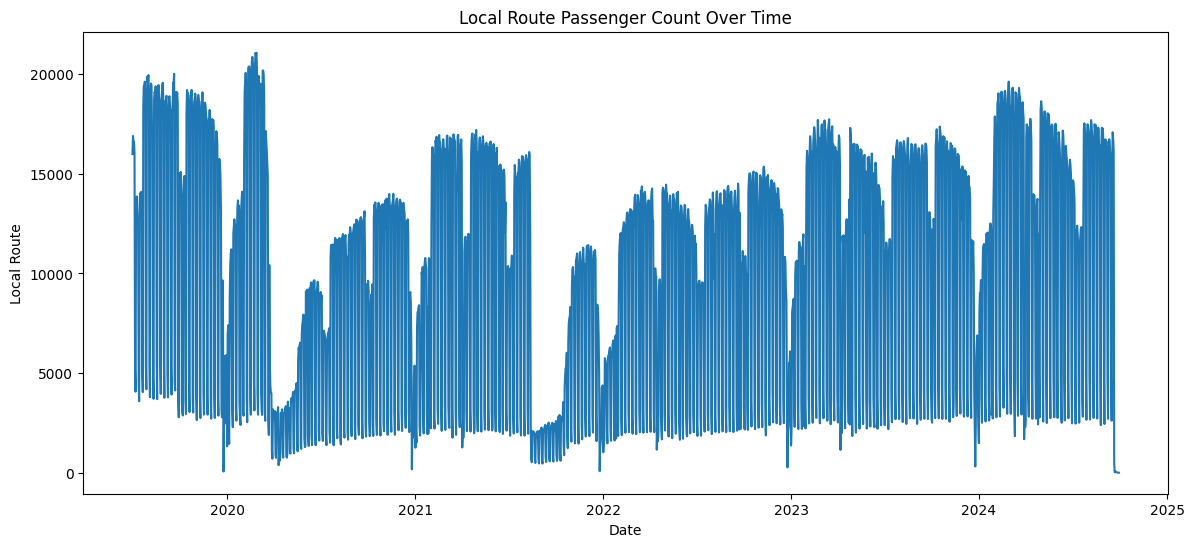

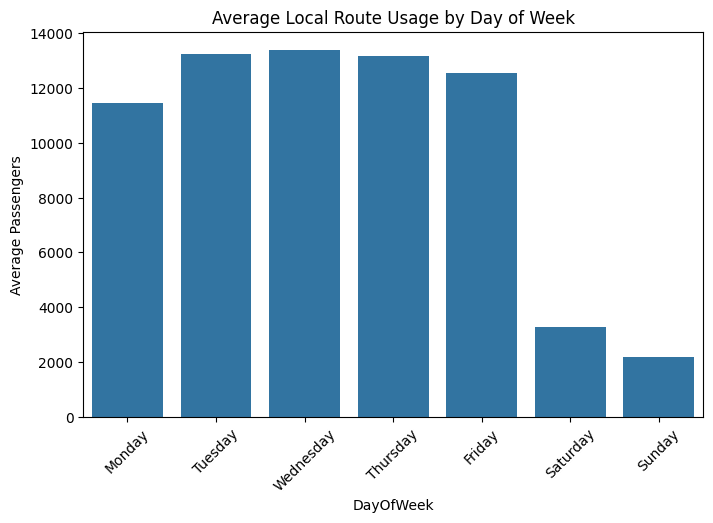

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Local Route usage over time
plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='Date', y='Local Route')
plt.title('Local Route Passenger Count Over Time')
plt.show()

# Plot average Local Route usage by day of week
plt.figure(figsize=(8,5))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x=daywise_local.index, y=daywise_local.values, order=day_order)
plt.title('Average Local Route Usage by Day of Week')
plt.ylabel('Average Passengers')
plt.xticks(rotation=45)
plt.show()


In [ ]:
total_rows = len(df)
print("Total number of rows (days):", total_rows)


Total number of rows (days): 1918
